                                                            UC00139: Optimization of Outdoor Activities

Optimization of the Outdoor or Open-Space Fitness Activities In Melbourne
Authored by: Ananya Krishnan
Duration: 90 mins
Level: Intermediate
Pre-requisite Skills: Python, , Geospatial Analysis, Clustering, Predictive Modelling, Machine Learning

Problem Identified or Scenerio along with the Solution :
In the city of Melbourne, population of people who prefer outdoor fitness is around 10.3 million. These ativities include walking, yoga, running, recreational games,etc. What does any individual look-out when they choose open-space practices-
1. Ideal spots to execute their workouts.

The step by step implementation guide is outlined below as the answer to the above problem statement:

1. Libraries and packages are installed. Besides, data from various packeges are imported.
2. Data procuring or acquisition where data is gathered from APIs provided by the company. Moreover, the data is showcased in entirety for obtaining summary of primary and statistical infrmation.
3. Data cleaning and pre-processing, here data is organised such that the precise details are forwarded for any sort of processing or computation. Next, latitude and longitude values extracted from given location co-ordinates. Followed by calculation of foot-traffic and geo-spatial analysis is conducted for each dataset. Further, the determined geometry column of the dataset is activated. Then, every datasets are combined spacially.
4. Exploratory data analysis part is where vital characteristics are encapsulated, patterns are discovered, anomalies spotted, and data is visualized for further investigation. The cases at the moment are pedestrian flow in open-space (Melbourne city) with and without comfort-resources availability and accessibility.
5. K-means clustering is applied to get count of active-individuals of Melbourne city.
6. Visual illustration of in-depth analysis of pedestrian traffic in Melbourne city.

Some assumptions are considered while designing the services for the use case:
1. Pedestrian network is considered safe for outdoor activitiees (High traffic zone is penalized and does not affect the movement of people).
2. Tree canopy dataset from year 2018 has no change in year 2024.
3. For EDA of pedestrian traffic analysis the latitude factor is considered as it was the common key for merged dataset.
4. For box plot graphs x-axis where location co-ordinate values are used might not look clear but using the above dataset details all data will be visible.

 Let's have walkthrough of this extensive piece of work!

##### STEP 1: PRE-REQUISITES AND LIBRARY INSTALLATIONS ALONG WITH IMPORTING DATA FROM PACKAGES

### First phase is all about setup and preparation before actual coding commences. The very vital essence of programming is collecting and installing the mandatory libraries (frameworks that provide pre-written code for various tasks) and packages (collection of modules). Their existence aids in efficient software development.

In [1]:
# libraries and packages installed.
! pip install requests pandas numpy geopandas scikit-learn matplotlib folium

In [2]:
# functions imported from various packages and libraries. Direct import implies that libraries and packages are in-built.
import requests                        # Used in Step 2
import pandas as pd                    # Used in Step 2
from io import StringIO                # Used in Step 2
import geopandas as gpd                # Used in Step 3
from sklearn.cluster import KMeans     # Used in Step 5
import seaborn as sns                  # Used in Step 4
import folium                          # Used in Step 6
import matplotlib.pyplot as plt        # Used in Step 4,5
import numpy as np                     # Used in Step 4


##### STEP 2: DATA ACQUISITION

### Second phase indicates how the data is extracted from the source, exibited in raw form and then entire details are retrieved. The source URL for datasets is provided. Now, the given link is downloaded, content is stored, decoded, and parsed into a dataframe. Going ahead the coloumns are showcased along with the length of the dataset. Finally, the required datset is in view and statistical data summary is generated.

In [3]:
# parsing the dataset name and API key
def API_upload(link_dataset):
 
    # define API endpoints
    core_url= 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    # dataset_id= apiKey
    key= link_dataset
    format= 'csv'
    web_url= f'{core_url}{key}/exports/{format}'
    params={
        # similar to SQL's  queries
        'select': '*',      # selects all fields from dataset
        'timezone': 'UTC',  # setting desired time zone in return data
        'lang': 'en',       # specifies language preference of data being retrieved
        'limit': '-1',      # defines maximum number of records to return
    }
    # get request for retrieving response
    response= requests.get(web_url, params= params)
    if response.status_code == 200:
        url_content= response.content.decode('utf-8')                   # convert raw response in bytes into UTF-8 encoded string
        df_dataset= pd.read_csv(StringIO(url_content), delimiter= ';')  # parse the csv content into a pandas DataFrame
        print('\n', key, '\n', df_dataset)
        pd.set_option('display.max_columns', None)                      # exhibit all coloumns of the data set
        print('\nlength of above dataset=', len(df_dataset))            # length of dataset computed
        return df_dataset
    else:
        return (print(f'Error fetching data from {web_url}: {response.status_code}'))
    
# download url 1.0.0 (Service 1.for pedestrian data.sensor location URL)
link_pedCount= 'pedestrian-counting-system-sensor-locations'
# download url 1.0.1 (Service 1.for pedestrian data.pedestrian count every minute URL)
link_countPm= 'pedestrian-counting-system-past-hour-counts-per-minute'

# download url 1.1.0 (Service 1.for open space data.urban forest URL)
link_urbanForest= 'trees-with-species-and-dimensions-urban-forest'
# download url 1.1.1 (Service 1.for open space data.playground URL)
link_playground= 'playgrounds'
# download url 1.1.2 (Service 1.for open space data.pedestrian network/track URL)
link_pedTrack= 'pedestrian-network'

# download url 2.0.0 (Service 2.for amenities. drinking fountains URL) 
link_drinkingFountains= 'drinking-fountains'
# download url 2.0.1 (Service 2.for amenities.public washrooms URL)
link_publicWashrooms= 'public-toilets'
# download url 2.0.2 (Service 2.for amenities.public asset URL) 
link_publicAsset= 'street-furniture-including-bollards-bicycle-rails-bins-drinking-fountains-horse-'
# download url 2.0.3 (Service 2.for tree-canopies.tree-canopies-2021-urban-forest URL)
#link_treeCanopy= 'tree-canopies-2021-urban-forest'
link_treeCanopy= 'tree-canopies-public-realm-2018-urban-forest'

# loading the data via function 'API_upload()'-
# pedestrian counting system
df_pedFreq= API_upload(link_pedCount)
# pedestrian counting each minute
df_pedFreq_Pm= API_upload(link_countPm)
# urban forest in Melbourne
df_urbanForest= API_upload(link_urbanForest)
# playgrounds in Melbourne
df_playground= API_upload(link_playground)
# pedestrian network/track of Melbourne city
df_pedTrack= API_upload(link_pedTrack)
# drinking fountains in Melbourne city
df_drinkingFountains= API_upload(link_drinkingFountains)
# public washrooms in Melbourne city
df_publicWashroom= API_upload(link_publicWashrooms)
# public asset in Melbourne city
df_publicAsset= API_upload(link_publicAsset)
# tree canopies in Melbourne city
df_treeCanopy= API_upload(link_treeCanopy)


 pedestrian-counting-system-sensor-locations 
      location_id                      sensor_description   sensor_name  \
0             24           Spencer St-Collins St (North)      Col620_T   
1             25  Melbourne Convention Exhibition Centre        MCEC_T   
2             36                         Queen St (West)       Que85_T   
3             41          Flinders La-Swanston St (West)         Swa31   
4             44            Tin Alley-Swanston St (West)         UM3_T   
..           ...                                     ...           ...   
136          161        Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164               I-Hub 526 La Trobe Street      Lat526_T   
138          164               I-Hub 526 La Trobe Street      Lat526_T   
139          164               I-Hub 526 La Trobe Street      Lat526_T   
140          166                      484 Spencer Street     Spen484_T   

    installation_date                                        no

# 2.1 => Exhibiting the entire dataset for the following-

In [7]:
# pedestrian counting system
dataset_pedPopulation= df_pedFreq.head(len(df_pedFreq))
print('\nSensor Location Dataset:\n', dataset_pedPopulation)

# pedestrian counting each minute
dataset_pedPopulation_Pm= df_pedFreq_Pm.head(len(df_pedFreq_Pm))
print('\nPedestrian Count Per Minute Dataset:\n', dataset_pedPopulation_Pm)

# urban forest in Melbourne
dataset_urbanForest= df_urbanForest.head(len(df_urbanForest))
print('\nUrban Forest Dataset:\n', dataset_urbanForest)

# playgrounds in Melbourne
dataset_playground= df_playground.head(len(df_playground))
print('\nPlayground Dataset:\n', dataset_playground)

# pedestrian network/track of Melbourne city
dataset_pedTrack= df_pedTrack.head(len(df_pedTrack))
print('\nPedestrian Track Dataset:\n', dataset_pedTrack)

# drinking fountains in Melbourne city
dataset_drinkingFountains= df_drinkingFountains.head(len(df_drinkingFountains))
print('\nDrinking Fountains Dataset:\n', dataset_drinkingFountains)

# public washrooms in Melbourne city
dataset_publicWashroom= df_publicWashroom.head(len(df_publicWashroom))
print('\nPublic Washroom Dataset:\n', dataset_publicWashroom)

# public asset in Melbourne city
dataset_publicAsset= df_publicAsset.head(len(df_publicAsset))
print('\nPublic Assets Dataset:\n', dataset_publicAsset)

# tree canopies in Melbourne city
dataset_treeCanopy= df_treeCanopy.head(len(df_treeCanopy))
print('\nTree Canopies Dataset:\n', dataset_treeCanopy)



Sensor Location Dataset:
      location_id                      sensor_description   sensor_name  \
0             24           Spencer St-Collins St (North)      Col620_T   
1             25  Melbourne Convention Exhibition Centre        MCEC_T   
2             36                         Queen St (West)       Que85_T   
3             41          Flinders La-Swanston St (West)         Swa31   
4             44            Tin Alley-Swanston St (West)         UM3_T   
..           ...                                     ...           ...   
136          161        Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164               I-Hub 526 La Trobe Street      Lat526_T   
138          164               I-Hub 526 La Trobe Street      Lat526_T   
139          164               I-Hub 526 La Trobe Street      Lat526_T   
140          166                      484 Spencer Street     Spen484_T   

    installation_date                                        note  \
0          2013

# 2.2 => Outline the fundamental information, statistics summary , and the missing values for the following-

In [8]:
# sensor location dataset details:
print("Sensor Location Dataset Details:\n")
print(dataset_pedPopulation.info())
print("\nSensor Location Dataset Statistics Encapsulation:")
print(dataset_pedPopulation.describe())
print("\nLost Values of Sensor Location Dataset:")
print(dataset_pedPopulation.isnull().sum())

# pedestrian frequency per minute dataset details:
print("\nPedestrian Frequency per Minute Dataset Details:")
print(dataset_pedPopulation_Pm.info())
print("\nPedestrian Frequency per Minute Dataset Statistics Encapsulation:")
print(dataset_pedPopulation_Pm.describe())
print("\nLost Values of Pedestrian Frequency per Minute:")
print(dataset_pedPopulation_Pm.isnull().sum())

# urban forest dataset details:
print("Urban Forest Dataset Details:")
print(dataset_urbanForest.info())
print("\nUrban Forest Dataset Statistics Encapsulation:")
print(dataset_urbanForest.describe())
print("\nLost Values of Urban Forest Dataset:")
print(dataset_urbanForest.isnull().sum())

# playground dataset details:
print("Playground Dataset Details:")
print(dataset_playground.info())
print("\nPlayground Dataset Statistics Encapsulation:")
print(dataset_playground.describe())
print("\nLost Values of Playground Dataset:")
print(dataset_playground.isnull().sum())

# pedestrian track dataset details:
print("Pedestrian Track Dataset Details:")
print(dataset_pedTrack.info())
print("\nPedestrian Track Dataset Statistics Encapsulation:")
print(dataset_pedTrack.describe())
print("\nLost Values of Pedestrian Track Dataset:")
print(dataset_pedTrack.isnull().sum())

# drinking fountains in Melbourne city
print("Drinking Fountains Dataset Details:\n")
print(dataset_drinkingFountains.info())
print("\nDrinking Fountains Dataset Statistics Encapsulation:")
print(dataset_drinkingFountains.describe())
print("\nLost Values of Drinking Fountains Dataset:")
print(dataset_drinkingFountains.isnull().sum())

# public washrooms in Melbourne city
print("Public Washroom Dataset Details:\n")
print(dataset_publicWashroom.info())
print("\nPublic Washroom Dataset Statistics Encapsulation:")
print(dataset_publicWashroom.describe())
print("\nLost Values of Public Washroom Dataset:")
print(dataset_publicWashroom.isnull().sum())

# public asset in Melbourne city
print("Public Asset Dataset Details:\n")
print(dataset_publicAsset.info())
print("\nPublic Asset Dataset Statistics Encapsulation:")
print(dataset_publicAsset.describe())
print("\nLost Values of Public Asset Dataset:")
print(dataset_publicAsset.isnull().sum())

# tree canopies in Melbourne city
print("Tree Canopies Dataset Details:\n")
print(dataset_treeCanopy.info())
print("\nTree Canopies Dataset Statistics Encapsulation:")
print(dataset_treeCanopy.describe())
print("\nLost Values of Tree Canopies Dataset:")
print(dataset_treeCanopy.isnull().sum())

Sensor Location Dataset Details:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location_id         141 non-null    int64  
 1   sensor_description  139 non-null    object 
 2   sensor_name         141 non-null    object 
 3   installation_date   139 non-null    object 
 4   note                33 non-null     object 
 5   location_type       141 non-null    object 
 6   status              141 non-null    object 
 7   direction_1         109 non-null    object 
 8   direction_2         109 non-null    object 
 9   latitude            141 non-null    float64
 10  longitude           141 non-null    float64
 11  location            141 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 13.3+ KB
None

Sensor Location Dataset Statistics Encapsulation:
       location_id    latitude   longitude
count   141.0

##### STEP 3: DATA CLEANING AND DATA PRE-PROCESSING

### Third phase implies data cleaning and data manipulation. Unwanted data is eliminated and data manipulations are conducted at the level of geospatial as well to accomplish the end-result.

# 3.1 => Clean the following data-

In [9]:
# sensor location API:
dataset_pedPopulation['installation_date']= pd.to_datetime(dataset_pedPopulation['installation_date'], errors='coerce')
dataset_pedPopulation.dropna(subset= ['installation_date'], inplace= True)
print('Cleaned Sensor Location Dataset:','\n', dataset_pedPopulation)
# urban forest in Melbourne:
dataset_park= dataset_urbanForest[dataset_urbanForest['located_in']!= 'Street']  # dataset for parks in Melbourne is retrieved. Dataset for streets is avoided considering safety for running.
print('Cleaned Urban Forest Dataset:','\n', dataset_park)

# drinking fountains in Melbourne city: ---> cleaning of data is not needed.
# public washrooms in Melbourne city: ---> cleaning of data is not needed.
# public asset in Melbourne city:
dataset_seats= dataset_publicAsset[dataset_publicAsset['asset_type']=='Seat']  # dataset for public seats is retrieved.
dataset_seats= dataset_seats.copy()  # explicitly copy is created before any modification is made. 'To avoid SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame' warning.
dataset_seats.dropna(subset=['coordinatelocation'],inplace= True)  # rows which has 'NAN' values for column 'coordinatelocation' are dropped from the table.
print('Cleaned Public Asset Dataset for Seats:','\n', dataset_seats)
# tree canopies in Melbourne city: ---> cleaning of data is not needed.

Cleaned Sensor Location Dataset: 
      location_id                      sensor_description   sensor_name  \
0             24           Spencer St-Collins St (North)      Col620_T   
1             25  Melbourne Convention Exhibition Centre        MCEC_T   
2             36                         Queen St (West)       Que85_T   
3             41          Flinders La-Swanston St (West)         Swa31   
4             44            Tin Alley-Swanston St (West)         UM3_T   
..           ...                                     ...           ...   
136          161        Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164               I-Hub 526 La Trobe Street      Lat526_T   
138          164               I-Hub 526 La Trobe Street      Lat526_T   
139          164               I-Hub 526 La Trobe Street      Lat526_T   
140          166                      484 Spencer Street     Spen484_T   

    installation_date                                        note  \
0      

# 3.1 => Geospatial location coordinates are made split into latitude and longitude coordinate values.

In [10]:
# function to split a geolocation co-ordinate into latitude and longitude.
def geoLocSplit(dataset,dataset_loc):
    if 'latitude' in dataset.columns:  # verify if latitude and longitude column exists, if yes then drop them.
        dataset.drop(columns=['latitude','longitude'], inplace=True)
    # transform string 'geo_point_2d'/'coordinatelocation' into a list of floats.
    dataset_loc= dataset_loc.apply(lambda x: [float(i) for i in x.split(",")] if isinstance(x,str) else [float('nan'),float('nan')])
    # split the column 'geo_point_2d'/'coordinatelocation' into latitude and longitude columns.
    coordinate_split= pd.DataFrame(dataset_loc.to_list(), columns=['latitude', 'longitude'])
    # concatenate new columns with the original data frame.
    dataset= pd.concat([dataset.reset_index(drop=True),coordinate_split.reset_index(drop=True)], axis=1)
    return dataset

# playgrounds in Melbourne ---> Open-Space
dataset_playground= geoLocSplit(dataset_playground,dataset_playground['geo_point_2d'])
print('Geo-coordinates of Playground Dataset:','\n', dataset_playground)
# pedestrian network/track of Melbourne city ---> Open-Space
dataset_pedTrack= geoLocSplit(dataset_pedTrack,dataset_pedTrack['geo_point_2d'])
print('Geo-coordinates of Pedestrian Track Dataset:','\n', dataset_pedTrack)

# public seat in Melbourne city ---> Amenities
dataset_seats= geoLocSplit(dataset_seats,dataset_seats['coordinatelocation'])
print('Geo-coordinates of Seats Dataset:','\n', dataset_seats)

# tree canopies in Melbourne city ---> Urban Canopies 
dataset_treeCanopy= geoLocSplit(dataset_treeCanopy,dataset_treeCanopy['geo_point_2d'])
print('Geo-coordinates of Tree Canopies Dataset:','\n', dataset_treeCanopy)

Geo-coordinates of Playground Dataset: 
                                geo_point_2d  \
0      -37.7978870186655, 144.9259420093936   
1    -37.82015371307213, 144.94476081594655   
2    -37.838793729508225, 144.9850522156393   
3   -37.781221527129574, 144.96214347994342   
4   -37.796615304958806, 144.92060508965284   
5    -37.79356615908827, 144.94008253076515   
6    -37.818149015388066, 144.9712309067726   
7    -37.79542804645323, 144.92088329716032   
8     -37.79831312148108, 144.9212247231253   
9     -37.8020962906074, 144.97067458905988   
10  -37.816522726624655, 144.93375500298453   
11   -37.797285033377186, 144.9739866829798   
12  -37.808765867846496, 144.94479636670366   
13   -37.80718322149278, 144.95159199209743   
14   -37.78509788859067, 144.94203123068968   
15    -37.8260106301916, 144.96835314420716   
16    -37.8218009873152, 144.94722750144075   
17    -37.80284131718294, 144.9626564799592   
18    -37.8095257090171, 144.95471867901864   
19    -37.798788587

# 3.2 => Computation of foot traffic.

In [11]:
# to compute pedestrian data: merge both the datasets (dataset_pedPopulation and dataset_pedPopulation_Pm) based on the location_id field, where both datasets are not of same size in terms of rows and columns.
merged_footTraffic= pd.merge(dataset_pedPopulation, dataset_pedPopulation_Pm, on='location_id', how='outer')
print("Merged Foot Traffic:\n", merged_footTraffic)

Merged Foot Traffic:
        location_id          sensor_description sensor_name installation_date  \
0                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
1                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
2                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
3                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
4                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
...            ...                         ...         ...               ...   
28712          166          484 Spencer Street   Spen484_T        2024-09-25   
28713          166          484 Spencer Street   Spen484_T        2024-09-25   
28714          166          484 Spencer Street   Spen484_T        2024-09-25   
28715          166          484 Spencer Street   Spen484_T        2024-09-25   
28716          166          484 Spencer Street   Spen484_T        2024-09-25   

                 

# 3.3 => Geo-spatial analysis.

In [12]:
# function is to create geoDataFrame  where each row is associated with a spatial geometry (Point).
def processed_geoData(df, lon_attr, lat_attr):                          # consider longitude and latitude attributes.
    df= df.copy()                                                       # '.copy()'- copy original data frame before inplace modification.
    df.dropna(subset=[lon_attr, lat_attr], inplace=True)                # removing rows where longitude and latitude columns have missing values.
    df['geometry']= gpd.points_from_xy(df[lon_attr],df[lat_attr])       # the new column 'geometry' stores these point objects enabling geospatial analysis.
    gdf= gpd.GeoDataFrame(df, geometry= 'geometry', crs= "EPSG:4326")   # converts Pandas DataFrame (df) into a GeoPandas GeoDataFrame.  The variable 'crs' specifies the Coordinate Reference System (CRS) for the GeoDataFrame. 
    return gdf                                                          # returns newly created GeoDataFrame with spatial information.
    
# geospatial data from pedestrian dataset for pre-processing.
pedGeo_data= processed_geoData(merged_footTraffic, 'longitude', 'latitude')
# print("\nPedestrian geo-spatial data\n",pedGeo_data)  #---> testing if pedestrian geospatial data is retrieved along with entire dataset.
geoPed_data= pedGeo_data[['latitude','longitude','geometry']]
print("\nPedestrian geo-spatial data\n",geoPed_data)  #---> testing if pedestrian geospatial data is retrieved.

# geospatial data from open-space datasets for pre-processing.
parkGeo_data= processed_geoData(dataset_park, 'longitude','latitude')
print("\nPark geo-spatial data\n",parkGeo_data)    #---> testing if park geospatial data is retrieved along with entire dataset.
playgroundGeo_data= processed_geoData(dataset_playground, 'longitude','latitude')
print("\nPlayground geo-spatial data\n",playgroundGeo_data)    #---> testing if playground geospatial data is retrieved along with entire dataset.
trackGeo_data= processed_geoData(dataset_pedTrack, 'longitude','latitude')
print("\nTrack geo-spatial data\n",trackGeo_data)    #---> testing if pedestrian track geospatial data is retrieved along with entire dataset.
openSpace_geoData= pd.concat([parkGeo_data[['latitude','longitude','geometry']],playgroundGeo_data[['latitude','longitude','geometry']],trackGeo_data[['latitude','longitude','geometry']]], axis=1, keys=['park','playground','track'])  # keys attribute is to assign a hierarichal (multi-level) column index to avoid conflicts. That is, to handle various columns of same name in various data frames.
print("\nOpen-space geo-spatial data\n",openSpace_geoData)  #---> testing if open-space geospatial data is retrieved.

# geospatial data from aminities datasets for pre-processing.
fountainGeo_data= processed_geoData(dataset_drinkingFountains, 'lon','lat')
print("\nDrinking fountains geo-spatial data\n",fountainGeo_data)    #---> testing if fountain geospatial data is retrieved along with entire dataset.
washroomGeo_data= processed_geoData(dataset_publicWashroom, 'lon','lat')
print("\nPublic washroom geo-spatial data\n",washroomGeo_data)    #---> testing if public washroom geospatial data is retrieved along with entire dataset.
seatsGeo_data= processed_geoData(dataset_seats, 'longitude','latitude')
print("\nPublic seats geo-spatial data\n",seatsGeo_data)    #---> testing if public seats geospatial data is retrieved along with entire dataset.
amenities_geoData= pd.concat([fountainGeo_data[['lat','lon','geometry']],washroomGeo_data[['lat','lon','geometry']],seatsGeo_data[['latitude','longitude','geometry']]], axis=1, keys=['drinking-fountains','public-washrooms','public-seats'])  # keys attribute is to assign a hierarichal (multi-level) column index to avoid conflicts. That is, to handle various columns of same name in various data frames.
print("\nAmenities geo-spatial data\n",amenities_geoData)  #---> testing if open-space geospatial data is retrieved.

# geospatial data from tree canopy datasets for pre-processing.
treeCanopyGeo_data= processed_geoData(dataset_treeCanopy, 'longitude','latitude')
print("\nTree canopy geo-spatial data\n",treeCanopyGeo_data)    #---> testing if tree canopy geospatial data is retrieved along with entire dataset.

# eliminate the duplicate geospatial data for pedestrian, open-space, amenities, to avoid redundancy of geo-data.
geoPed_data= geoPed_data.drop_duplicates()
print("\nRequired Pedestrian geo-spatial data\n",geoPed_data)
openSpace_geoData= openSpace_geoData.drop_duplicates()
print("\nRequired Open-space geo-spatial data\n",openSpace_geoData)
amenities_data= amenities_geoData.drop_duplicates()
print("\nRequired Amenities geo-spatial data\n",amenities_data)
treeCanopy_data= treeCanopyGeo_data.drop_duplicates()
print("\nRequired Tree-canopy geo-spatial data\n",treeCanopy_data)


Pedestrian geo-spatial data
         latitude   longitude                     geometry
0     -37.813494  144.965153  POINT (144.96515 -37.81349)
1     -37.813494  144.965153  POINT (144.96515 -37.81349)
2     -37.813494  144.965153  POINT (144.96515 -37.81349)
3     -37.813494  144.965153  POINT (144.96515 -37.81349)
4     -37.813494  144.965153  POINT (144.96515 -37.81349)
...          ...         ...                          ...
28712 -37.808967  144.949317  POINT (144.94932 -37.80897)
28713 -37.808967  144.949317  POINT (144.94932 -37.80897)
28714 -37.808967  144.949317  POINT (144.94932 -37.80897)
28715 -37.808967  144.949317  POINT (144.94932 -37.80897)
28716 -37.808967  144.949317  POINT (144.94932 -37.80897)

[28717 rows x 3 columns]

Park geo-spatial data
         com_id      common_name             scientific_name          genus  \
1      1357481     Cyprus Plane         Platanus orientalis       Platanus   
4      1042546    Golden Wattle            Acacia pycnantha         

# 3.4 => Geometry column for each dataset is set for any spatial operation in order to activate it.

In [13]:
# open space- for each index level of datatframe the geometry was set.
openSpace1_geoData= gpd.GeoDataFrame(openSpace_geoData, geometry=('park','geometry'))
openSpace2_geoData= gpd.GeoDataFrame(openSpace_geoData, geometry=('playground','geometry'))
openSpace3_geoData= gpd.GeoDataFrame(openSpace_geoData, geometry=('track','geometry'))
os_geoData= gpd.GeoDataFrame(pd.concat([openSpace1_geoData, openSpace2_geoData, openSpace3_geoData], ignore_index=True))

# aminities- for each index level of datatframe the geometry was set.
amenities1_geoData= gpd.GeoDataFrame(amenities_data, geometry=('drinking-fountains','geometry'))
amenities2_geoData= gpd.GeoDataFrame(amenities_data, geometry=('public-washrooms','geometry'))
amenities3_geoData= gpd.GeoDataFrame(amenities_data, geometry=('public-seats','geometry'))
amenities_data= gpd.GeoDataFrame(pd.concat([amenities1_geoData, amenities2_geoData, amenities3_geoData], ignore_index=True))

# geometry column for pedestrian data is set.
#geoPed_data= gpd.GeoDataFrame(traffic_added, geometry='geometry')
geoPed_data= gpd.GeoDataFrame(geoPed_data, geometry='geometry')


# geometry column for tree canopy data is set.
treeCanopy_data= gpd.GeoDataFrame(treeCanopy_data, geometry='geometry')


# 3.5 => Join or integrate datasets spacially.

In [14]:
fused_data= gpd.sjoin(os_geoData, geoPed_data, how="inner", predicate="intersects")
fused_data= fused_data.drop(columns=['index_right'])
fused_data= gpd.sjoin(fused_data, amenities_data, how="inner", predicate="intersects")
fused_data= fused_data.drop(columns=['index_right'])
fused_data= gpd.sjoin(fused_data, treeCanopy_data, how="inner", predicate="intersects")

In [15]:
# to test the columns present in combined data.
print("\nTesting the columns for integrated data\n", fused_data.columns)


Testing the columns for integrated data
 Index([            ('park', 'latitude'),            ('park', 'longitude'),
                   ('park', 'geometry'),       ('playground', 'latitude'),
            ('playground', 'longitude'),       ('playground', 'geometry'),
                  ('track', 'latitude'),           ('track', 'longitude'),
                  ('track', 'geometry'),                  'latitude_left',
                       'longitude_left',    ('drinking-fountains', 'lat'),
          ('drinking-fountains', 'lon'),      ('public-washrooms', 'lat'),
            ('public-washrooms', 'lon'), ('public-washrooms', 'geometry'),
           ('public-seats', 'latitude'),    ('public-seats', 'longitude'),
           ('public-seats', 'geometry'),                    'index_right',
                         'geo_point_2d',                      'geo_shape',
                             'objectid',                     'shape_leng',
                           'shape_area',                 '

##### STEP 4: EDA (EXPLORATORY DATA ANALYSIS)

### Fourth phase regards to graphical visuals that provides enlightment on realistic current state of data. Later, when operations are performed and the deviations occur on data, then their disparities can be compared by utilizing original state of data from this step.

In [16]:
# re-creating new pedestrian dataset with existing column and appending new pedestrian frequency column.
geoPed_data['pedestrianCount']= merged_footTraffic['total_of_directions']
print("\n Pedestrian data after pedestrian frequency computed \n",geoPed_data)

# evaluating the aminities count in public open-space (Melbourne City) available for everyone in general.
def amenities_freq(categories):
    count=0
    if categories['drinking-fountains']['geometry'] is not None and pd.notna(categories['drinking-fountains']['geometry']):
        count+= 1
    if categories['public-washrooms']['geometry'] is not None and pd.notna(categories['public-washrooms']['geometry']):
        count+= 1
    if categories['public-seats']['geometry'] is not None and pd.notna(categories['public-seats']['geometry']):
        count+= 1
    return count
amenities_data['amenitiesCount']= amenities_data.apply(amenities_freq, axis=1)
print("\nGetting amenities data \n",amenities_data)

# re-creating new pedestrian dataset with existing column and appending new aminities frequency column.
geoPed_data['aminities_Count']= amenities_data['amenitiesCount']
print("\nPedestrian data after amenities frequency computed\n",geoPed_data)

# to test the columns present in pedestrian dataset.
print("\nTesing for ped data\n", geoPed_data.columns)


 Pedestrian data after pedestrian frequency computed 
         latitude   longitude                     geometry  pedestrianCount
0     -37.813494  144.965153  POINT (144.96515 -37.81349)              2.0
431   -37.813807  144.965167  POINT (144.96517 -37.81381)              4.0
848   -37.811015  144.964295  POINT (144.96429 -37.81102)              6.0
2696  -37.814880  144.966088  POINT (144.96609 -37.81488)              8.0
3330  -37.818742  144.967877  POINT (144.96788 -37.81874)             26.0
...          ...         ...                          ...              ...
27125 -37.818513  144.971313  POINT (144.97131 -37.81851)              6.0
27210 -37.807404  144.959879   POINT (144.95988 -37.8074)             12.0
27355 -37.813005  144.951604     POINT (144.9516 -37.813)              1.0
28543 -37.809534  144.949390  POINT (144.94939 -37.80953)              2.0
28637 -37.808967  144.949317  POINT (144.94932 -37.80897)              2.0

[128 rows x 4 columns]

Getting amenities d

# 4.1 => Graphical representation of pedestrian traffic in Melbourne.

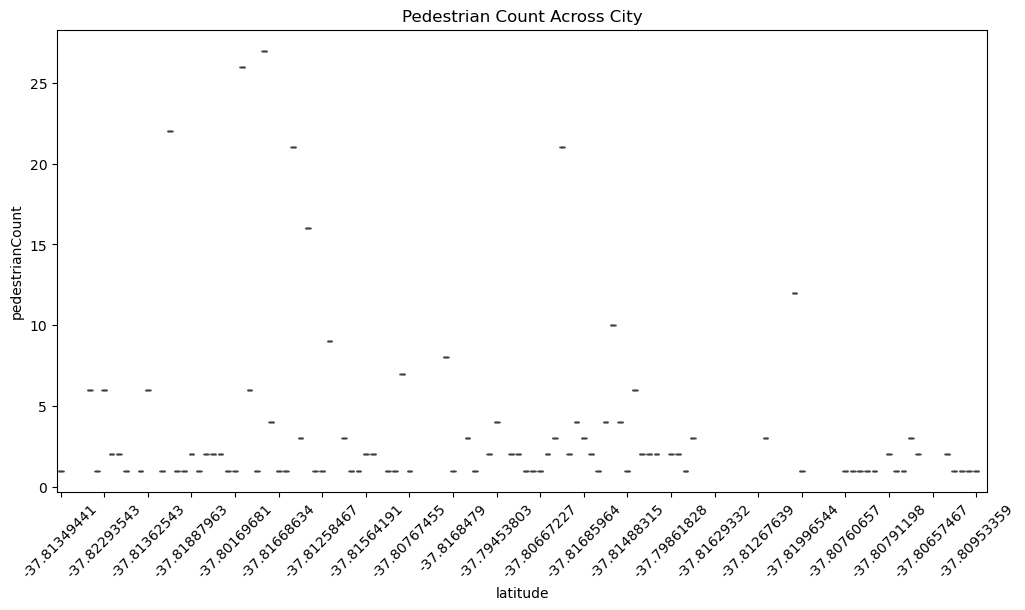

In [18]:
# Visualizing the pattern for foot traffic in Melbourne city via box plot.
plt.figure(figsize=(12,6))
sns.boxplot(data=geoPed_data, x="latitude", y="pedestrianCount")
# Tailor the x-axis for fewer labels
indices = np.arange(0, len(geoPed_data), 6)  # Every 6th latitude is visible on graph
plt.xticks(indices, geoPed_data['latitude'].iloc[indices], rotation=45)
plt.title("Pedestrian Count Across City")
plt.show()

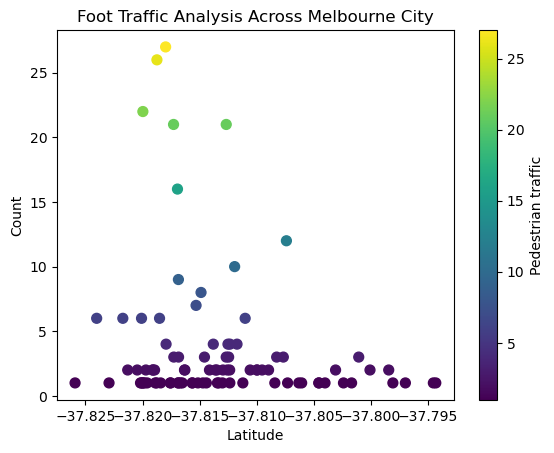

In [19]:
# Visualizing the pattern for foot traffic in Melbourne city via scatter graph.
plt.scatter(geoPed_data['latitude'],geoPed_data['pedestrianCount'], c= geoPed_data['pedestrianCount'], cmap= 'viridis', s=50)
plt.title('Foot Traffic Analysis Across Melbourne City')
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.colorbar(label='Pedestrian traffic')
plt.show()

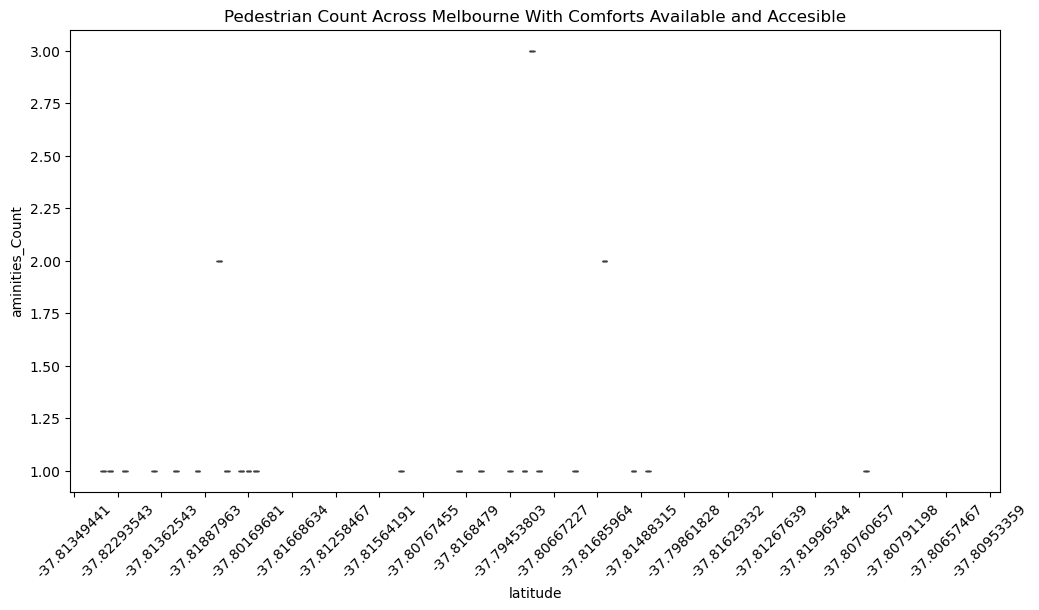

In [20]:
# Visualizing the pattern for foot traffic in Melbourne city via box plot, relying on accessible aminities.
plt.figure(figsize=(12,6))
sns.boxplot(data=geoPed_data, x="latitude", y="aminities_Count")
plt.xticks(rotation=90)
# Tailor the x-axis for fewer labels
indices = np.arange(0, len(geoPed_data), 6)  # Every 6th latitude is visible on graph
plt.xticks(indices, geoPed_data['latitude'].iloc[indices], rotation=45)
plt.title("Pedestrian Count Across Melbourne With Comforts Available and Accesible")
plt.show()

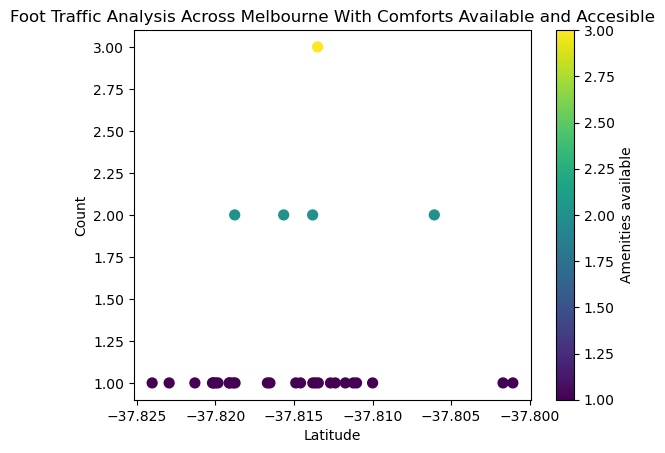

In [18]:
# Visualizing the pattern for foot traffic in Melbourne city via scatter graph, relying on accessible aminities.
plt.scatter(geoPed_data['latitude'],geoPed_data['aminities_Count'], c= geoPed_data['aminities_Count'], cmap= 'viridis', s=50)
plt.title('Foot Traffic Analysis Across Melbourne With Comforts Available and Accesible')
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.colorbar(label='Amenities available')
plt.show()

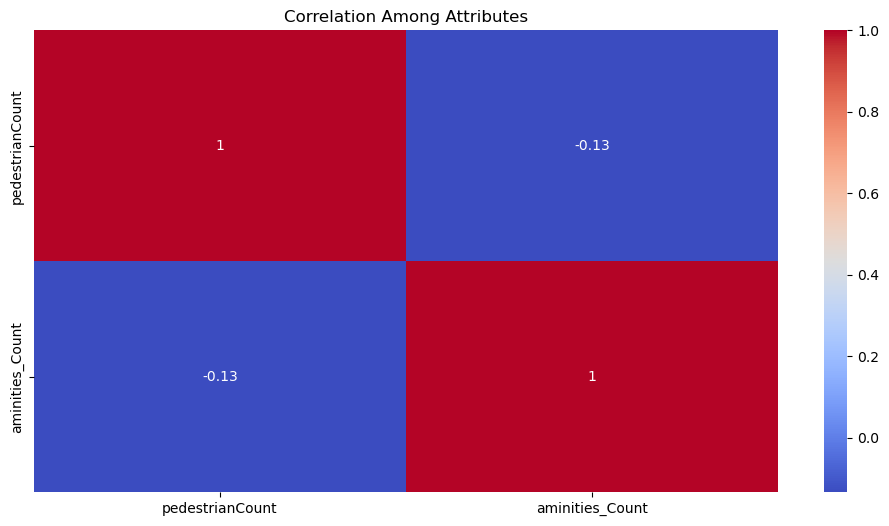

In [21]:
# heatmap portraying correlation between attributes implying count of pedestrians and aminities.
plt.figure(figsize=(12, 6))
sns.heatmap(geoPed_data[['pedestrianCount', 'aminities_Count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Among Attributes")
plt.show()

##### STEP 5: ANALYZING PEDESTRIAN TRAFFIC USING CLUSTERING

### Fifth phase, points to population that turns out for physical fitness or training in public open-spcaes of Melbourne. This also, establishes the fact that which locations are utilized and to what extent.

      latitude   longitude  pedestrianCount
0   -37.825910  144.961860              1.0
1   -37.825791  144.960843              0.0
2   -37.825562  144.961154              0.0
3   -37.825457  144.961312              0.0
4   -37.824018  144.956044              6.0
..         ...         ...              ...
123 -37.798082  144.967210              1.0
124 -37.796987  144.964413              1.0
125 -37.794538  144.930362              1.0
126 -37.794324  144.929734              1.0
127 -37.789353  144.928606              0.0

[128 rows x 3 columns]
0      4
1      1
2      1
3      1
4      0
      ..
123    4
124    4
125    4
126    4
127    1
Name: cluster, Length: 128, dtype: int32

Testing for latitude datatype
 float64

Testing for longitude datatype
 float64


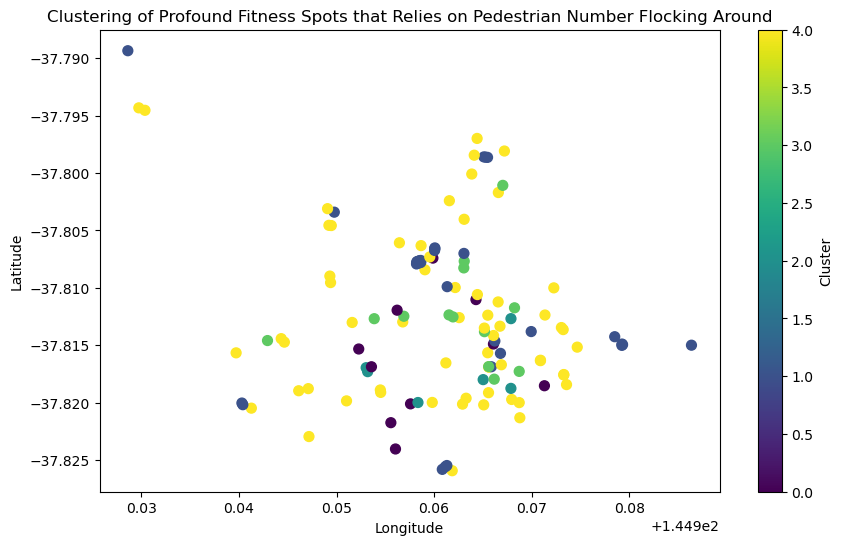

In [23]:
# data preparation for clustering

# pedestrian_count
pedCount= geoPed_data.groupby(['latitude', 'longitude'])['pedestrianCount'].sum().reset_index()
X= pedCount[['latitude', 'longitude', 'pedestrianCount']]
print(X.head(len(X)))

# apply K-Means clustering to identify the popular fitness spots based on pedestrian counts
k_means= KMeans(n_clusters=5,random_state=42)
pedCount['cluster']= k_means.fit_predict(X)  # cluster assignment
print (pedCount['cluster'])
# to test datatypes for latitude and longitude columns.
print("\nTesting for latitude datatype\n", pedCount['latitude'].dtypes)
print("\nTesting for longitude datatype\n", pedCount['longitude'].dtypes)

# visual representation of clusters
plt.figure(figsize= (10,6))
# pedCount['longitude'] --> Specifies the x-coordinates (longitude values) of the points.
# pedCount['latitude'] --> Specifies the y-coordinates (latitude values) of the points.
# c= pedCount['cluster'] --> The color of each point corresponds to its cluster assignment ('cluster' column in pedCount).
# cmap= 'viridis' --> Specifies the color map (viridis) to use for coloring clusters.
# s=50 --> Specifies the size of each scatteered point.
plt.scatter(pedCount['longitude'], pedCount['latitude'], c= pedCount['cluster'], cmap= 'viridis', s=50)
plt.title('Clustering of Profound Fitness Spots that Relies on Pedestrian Number Flocking Around')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

##### Step 6: Visualization of Analyzing pedestrian Traffic

The imagery on Melbourne city map of folks who are inclined to outdoor exercises rather than closed training. The open spaces marked with color codes red, blue, pink, purple, and orange gives the view of open-space usage and ideal spots to exercise freely. 

In [30]:
# data type conversion to integer typr for each attribute
pedCount['cluster'] = pedCount['cluster'].astype(int)
pedCount['latitude'] = pedCount['latitude'].astype(int)
pedCount['longitude'] = pedCount['longitude'].astype(int)

# Initialize a Folium map
map_center = [X['latitude'].mean(), X['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Assign a color for each cluster
#cluster_colors = ['red', 'blue', 'pink', 'purple', 'orange']
cluster_colors = ['black', 'grey', 'red', 'maroon', 'brown']
# Add markers for each point
for idx, row in pedCount.iterrows():
    cluster= row['cluster']
    color=cluster_colors[int(cluster)],  # Color based on cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Size of the marker
        fill=True,
        fill_color= color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"<b>Cluster:</b> {row['cluster']}<br>"
            f"<b>Pedestrian Count:</b> {row['pedestrianCount']}"
        )
    ).add_to(m)

# Display the map
m

Conclusion:
This whole documentation divulges the information on which public spaces in melbourne city for any outdoor fitness or recreational workouts. The ideal spots can be clearly seen through the pedestrian traffic which precisely refers the usage of open-spaces, and network of open-spaces. Various forms of visualizations in EDA steps depicts the following:
1. Box plot and scatter plot depicts the pedestrian flow throughout the city.
2. The other box plot and scatter plot displays the ideal paths and places for exercises where public aminities like drinking fountains, seats, and washrooms are accessible to all.
3. Correlation heatmap between pedestrian frequency and aminities count turns out to be like :
a. pedestrian count=1 and aminities count= -0.13 and vice versa. Pedestrian count represents perfect positive linear relationship, that is when it surges the aminities count with which it is correlated with also rises in the most predictable way. Thus, pedestrian count is disregarded for understanding the relationship between both the attributes. However, Aminities count leads to weak negative linear relationship, that is if one of them increases, the other tends to decrease slightly, since the relationship is weak. Closer the correlation to -1, stronger the negative relationship.
b. There is weak or no relationship between attributes pedestrian count and aminities count.

Finally, the ideal open-space network is marked on the Melbourne city map. 

                                                     -------------------- To Be Continued ---------------------------